<a href="https://colab.research.google.com/github/emirabiyyu/ML_2024/blob/main/Jobsheet4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Praktikum 1

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

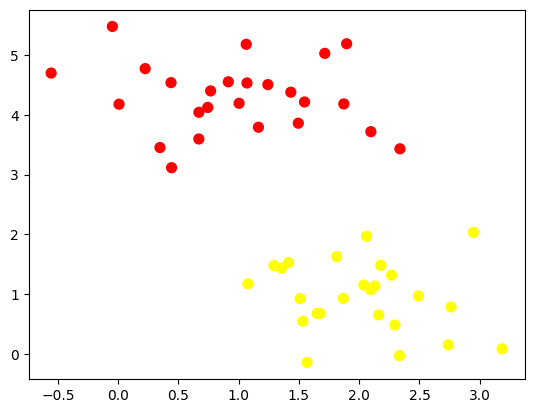

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

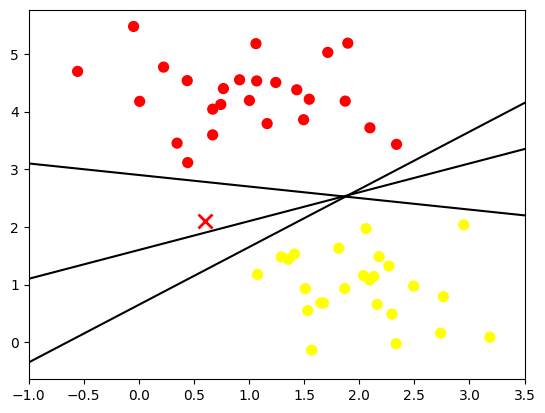

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

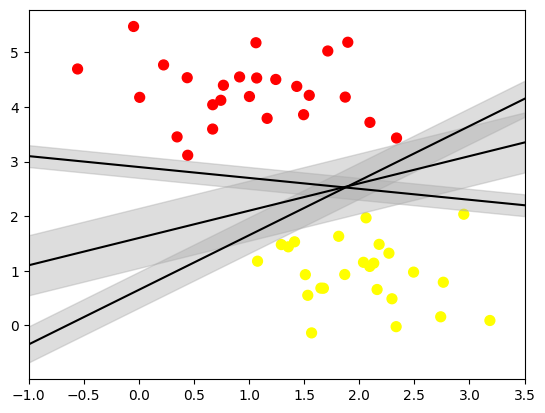

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [7]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

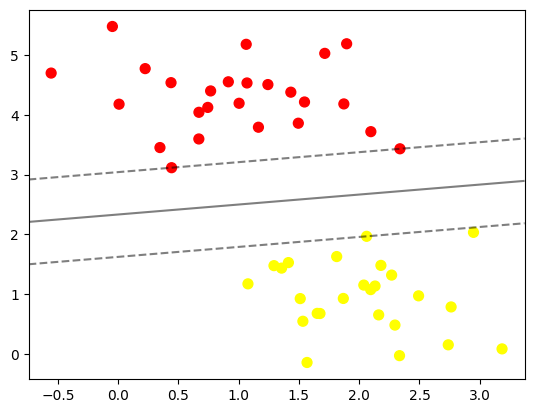

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [10]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_


array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

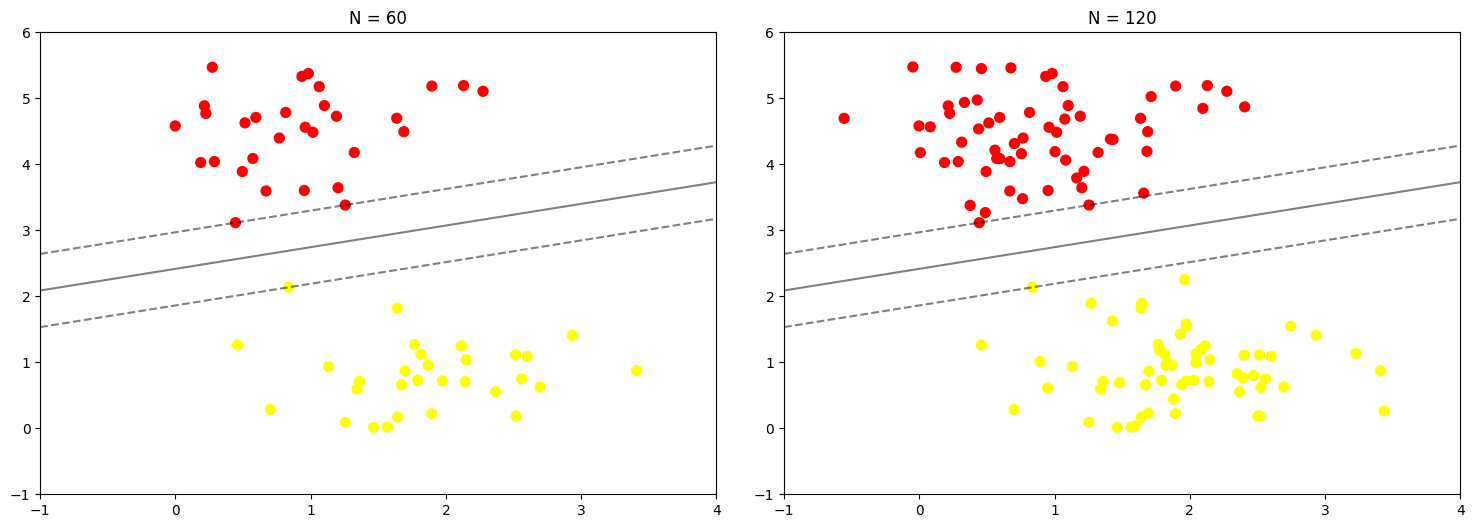

In [11]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

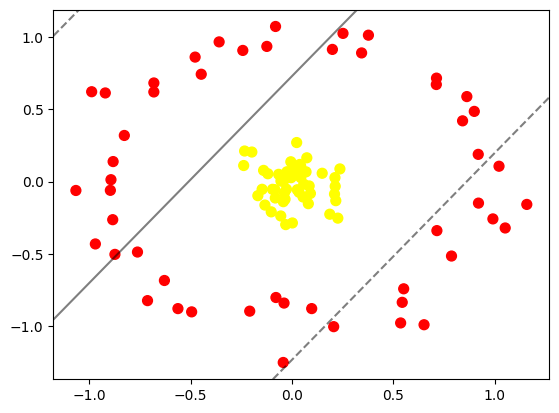

In [12]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [13]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-3.11204098e-02, -2.97232839e-01],
       [-2.38329817e-01,  1.11092514e-01],
       [ 7.29717816e-02,  1.64419439e-01],
       [ 9.90407276e-01, -2.57818486e-01],
       [-7.61956310e-01, -4.86835395e-01],
       [ 7.86351831e-01, -5.14473322e-01],
       [-6.29206524e-01, -6.83540382e-01],
       [-5.54905404e-02, -2.37493167e-01],
       [-1.47434289e-01, -5.31629265e-02],
       [-3.59389057e-01,  9.65673029e-01],
       [ 5.50567583e-01, -7.40989988e-01],
       [-6.81168176e-01,  6.81777063e-01],
       [ 2.12947069e-01, -3.22259600e-02],
       [ 1.15760089e+00, -1.57732256e-01],
       [-4.29707341e-02,  2.21457063e-04],
       [-9.69630145e-01, -4.30946087e-01],
       [ 1.02058023e+00,  1.06225651e-01],
       [ 8.45121286e-02, -2.99112624e-02],
       [ 3.47124793e-02, -7.37509428e-02],
       [-3.44200365e-02, -1.22185365e-01],
       [ 4.52679788e-02,  7.96992716e-02],
       [ 3.43104976e-01,  8.89363230e-01],
       [ 1.86271172e-01, -2.25375890e-01],
       [-9.87866348e-01,  6.21165287e-01],
       [ 8.61943977e-01,  5.87645133e-01],
       [ 2.09465456e-01, -8.60456123e-02],
       [-7.12468215e-01, -8.22693574e-01],
       [ 9.45419332e-03,  7.81016436e-02],
       [-4.77777641e-01,  8.60529650e-01],
       [ 7.14319529e-01, -3.38792036e-01],
       [ 2.25901922e-01, -2.52541394e-01],
       [ 2.05473913e-01, -1.00270556e+00],
       [-1.06564540e+00, -6.14059087e-02],
       [-1.68515113e-01, -9.71500125e-02],
       [-4.33256166e-02, -1.25023040e+00],
       [-2.42674907e-01,  9.06645645e-01],
       [ 2.29455114e-02,  2.69976196e-01],
       [-2.08552127e-01, -8.95487688e-01],
       [-1.19098510e-01,  5.42526311e-02],
       [-2.33798736e-01,  2.11378780e-01],
       [-1.98116837e-01,  2.04352916e-01],
       [-9.20668231e-01,  6.12730695e-01],
       [ 2.51312259e-01,  1.02440605e+00],
       [ 1.72038015e-03, -2.85841000e-01],
       [-5.62549817e-01, -8.77885358e-01],
       [ 3.57745067e-03,  9.06974949e-02],
       [ 9.19362425e-01, -1.48636473e-01],
       [-8.82078640e-01,  1.38435922e-01],
       [ 3.76711932e-01,  1.01199491e+00],
       [-8.24950267e-02, -1.13277410e-01],
       [-8.84051268e-01, -2.63250809e-01],
       [-8.92746903e-01,  1.31642489e-02],
       [ 6.90926948e-02,  6.75811307e-02],
       [-5.86201679e-03,  1.37060408e-01],
       [ 2.15856698e-01, -1.31848051e-01],
       [-6.81306648e-01,  6.19622856e-01],
       [ 5.79586291e-02, -1.77466436e-02],
       [ 5.35557753e-01, -9.76962619e-01],
       [ 1.48691120e-01,  5.76135765e-02],
       [ 7.11448482e-01,  6.71037579e-01],
       [ 9.05976026e-02, -8.18683352e-02],
       [ 6.50967055e-01, -9.89402727e-01],
       [ 1.99108017e-01,  9.13667564e-01],
       [-1.40169818e-01,  7.74184255e-02],
       [ 8.98690419e-01,  4.85264315e-01],
       [-7.93194009e-02, -8.01136487e-01],
       [ 2.59611840e-02, -5.63090259e-02],
       [-5.46335299e-02,  4.72491344e-03],
       [-8.12465108e-02,  1.07217988e+00],
       [-2.48078437e-02,  6.81310607e-02],
       [-3.73837386e-02, -7.73828591e-02],
       [-1.02524973e-01, -2.09074066e-01],
       [ 9.18139353e-01,  1.88298393e-01],
       [-4.94866299e-01, -9.00397611e-01],
       [-8.43659325e-02, -5.59517167e-02],
       [-1.24181095e-01,  9.34370903e-01],
       [-4.29976784e-02, -1.38800037e-01],
       [ 4.33334173e-02,  2.81062478e-02],
       [-2.75659411e-02, -5.26353023e-02],
       [ 3.84183283e-02,  1.18612311e-01],
       [ 2.11669790e-01,  2.74304045e-02],
       [ 4.27604861e-02,  1.08400782e-01],
       [-8.26848902e-01,  3.18916404e-01],
       [ 5.45020997e-02, -1.06468184e-01],
       [ 8.40926285e-01,  4.19980531e-01],
       [ 1.05110056e+00, -3.20542720e-01],
       [-8.95711137e-01, -6.03038609e-02],
       [-3.93736813e-02, -8.39590145e-01],
       [ 5.43366387e-01, -8.34515082e-01],
       [ 7.12360493e-01,  7.15151856e-01],
       [-6.59430568e-02,  5.02674580e-02],
       [ 2.36075433e-01,  8.76948168e-02

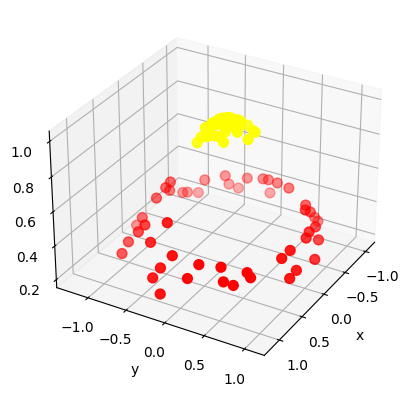

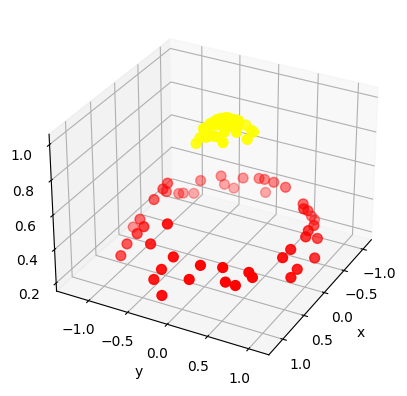

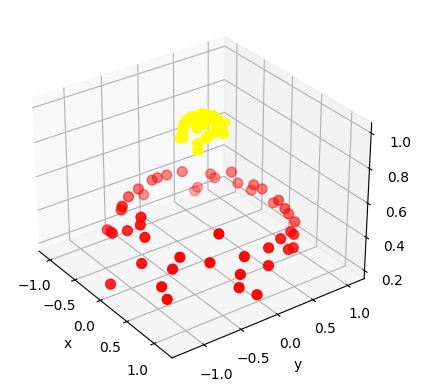

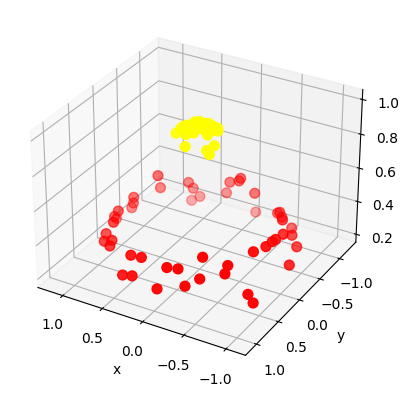

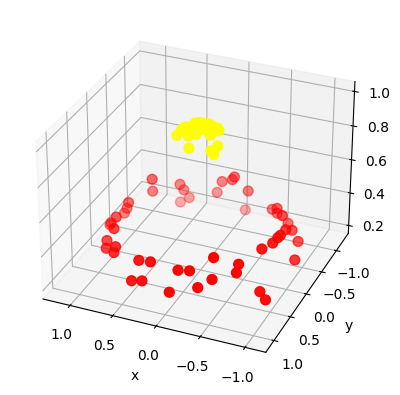

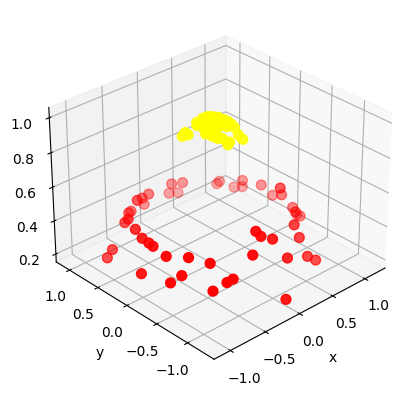

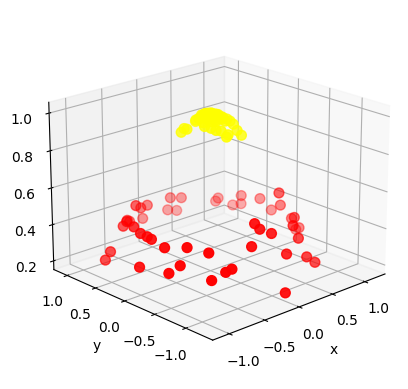

In [20]:
from mpl_toolkits import mplot3d
import ipywidgets as widgets # import the ipywidgets library
from ipywidgets import interact, fixed # import necessary functions


def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

In [21]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

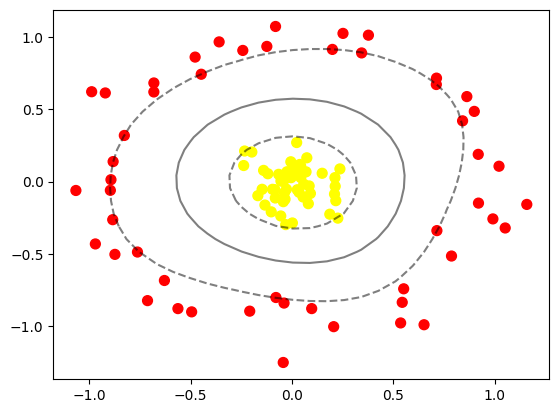

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

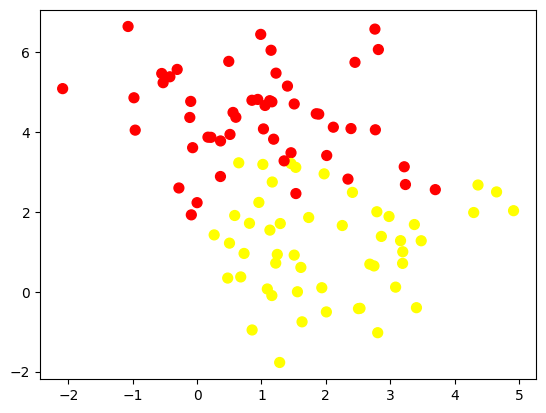

In [23]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

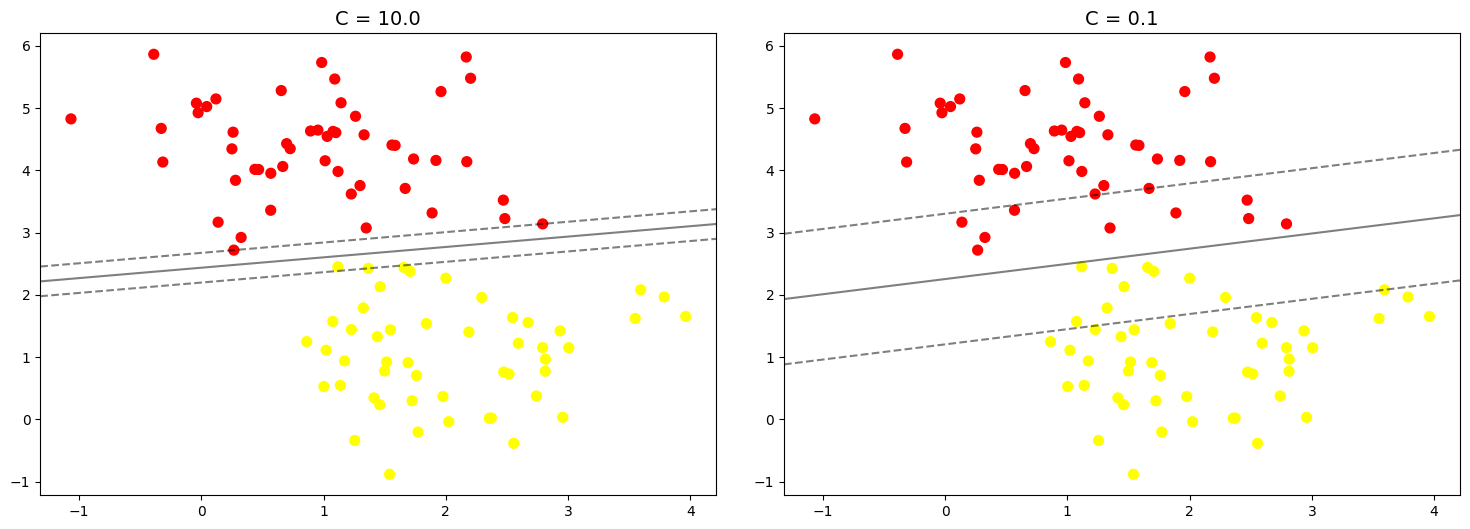

In [24]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

### Praktikum 2

In [25]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


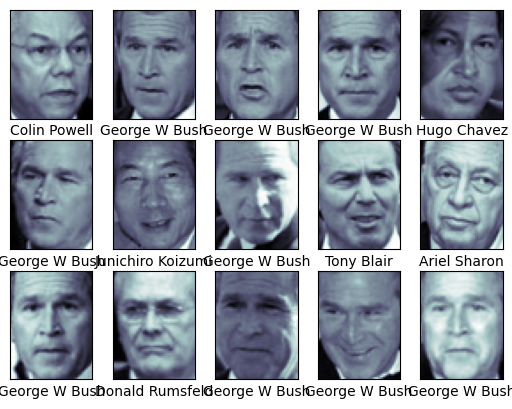

In [26]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [27]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [28]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 35s, sys: 27.2 s, total: 2min 3s
Wall time: 1min 15s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [30]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

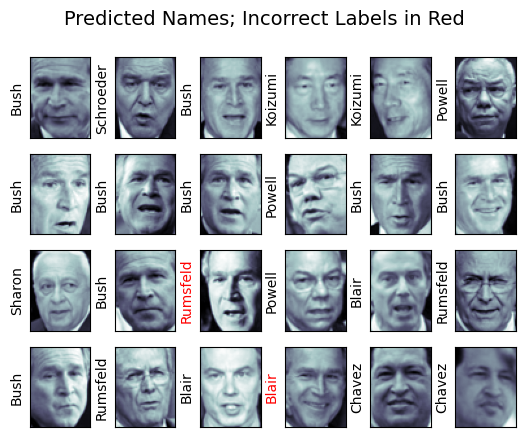

In [31]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

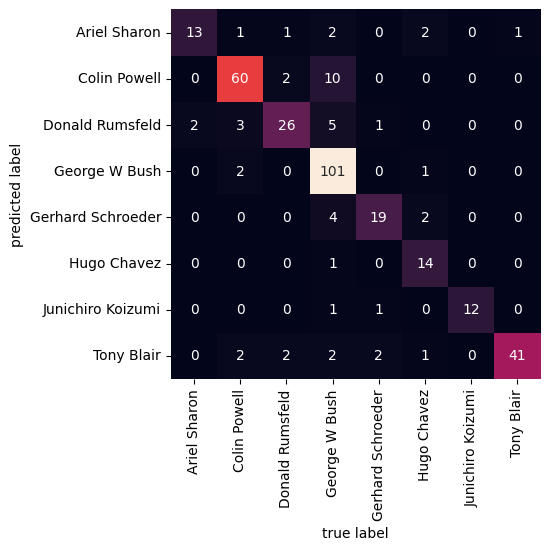

In [33]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Praktikum 3